#**Project** : **Classification**
#*Project Title* : *Customer Segmentation for Banking*



In [ ]:
#importing the required libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

##Importing and Loading data




In [ ]:
# Mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# Loading and reading the dataset
data = pd.read_csv('/content/drive/MyDrive/bank-full.csv', sep=';')
df = data.copy()

print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
# (Row,Column)
df.shape

(45211, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# check null values
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# checking the duplicate values
df.duplicated().value_counts()

,count
False,45211


DESCRIPTIVE ANALYSIS

In [ ]:
# some important statistical description of feature in our dataset
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
# List of Categorical feature
categorical_feature = list(df.select_dtypes(include=['object']))
categorical_feature

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [ ]:
# List of continuous feature
continuous_feature = list(df.select_dtypes(exclude=['object']))
continuous_feature

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

**EDA**

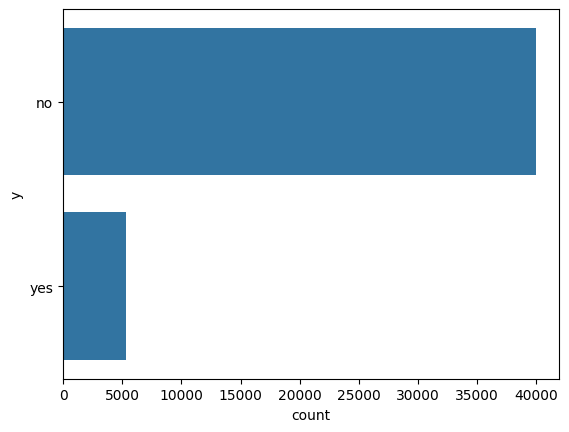

In [ ]:
# Visualize the target variable
g = sns.countplot(df['y'])

### Univariate Analysis


--- Univariate Analysis for Continuous Features ---


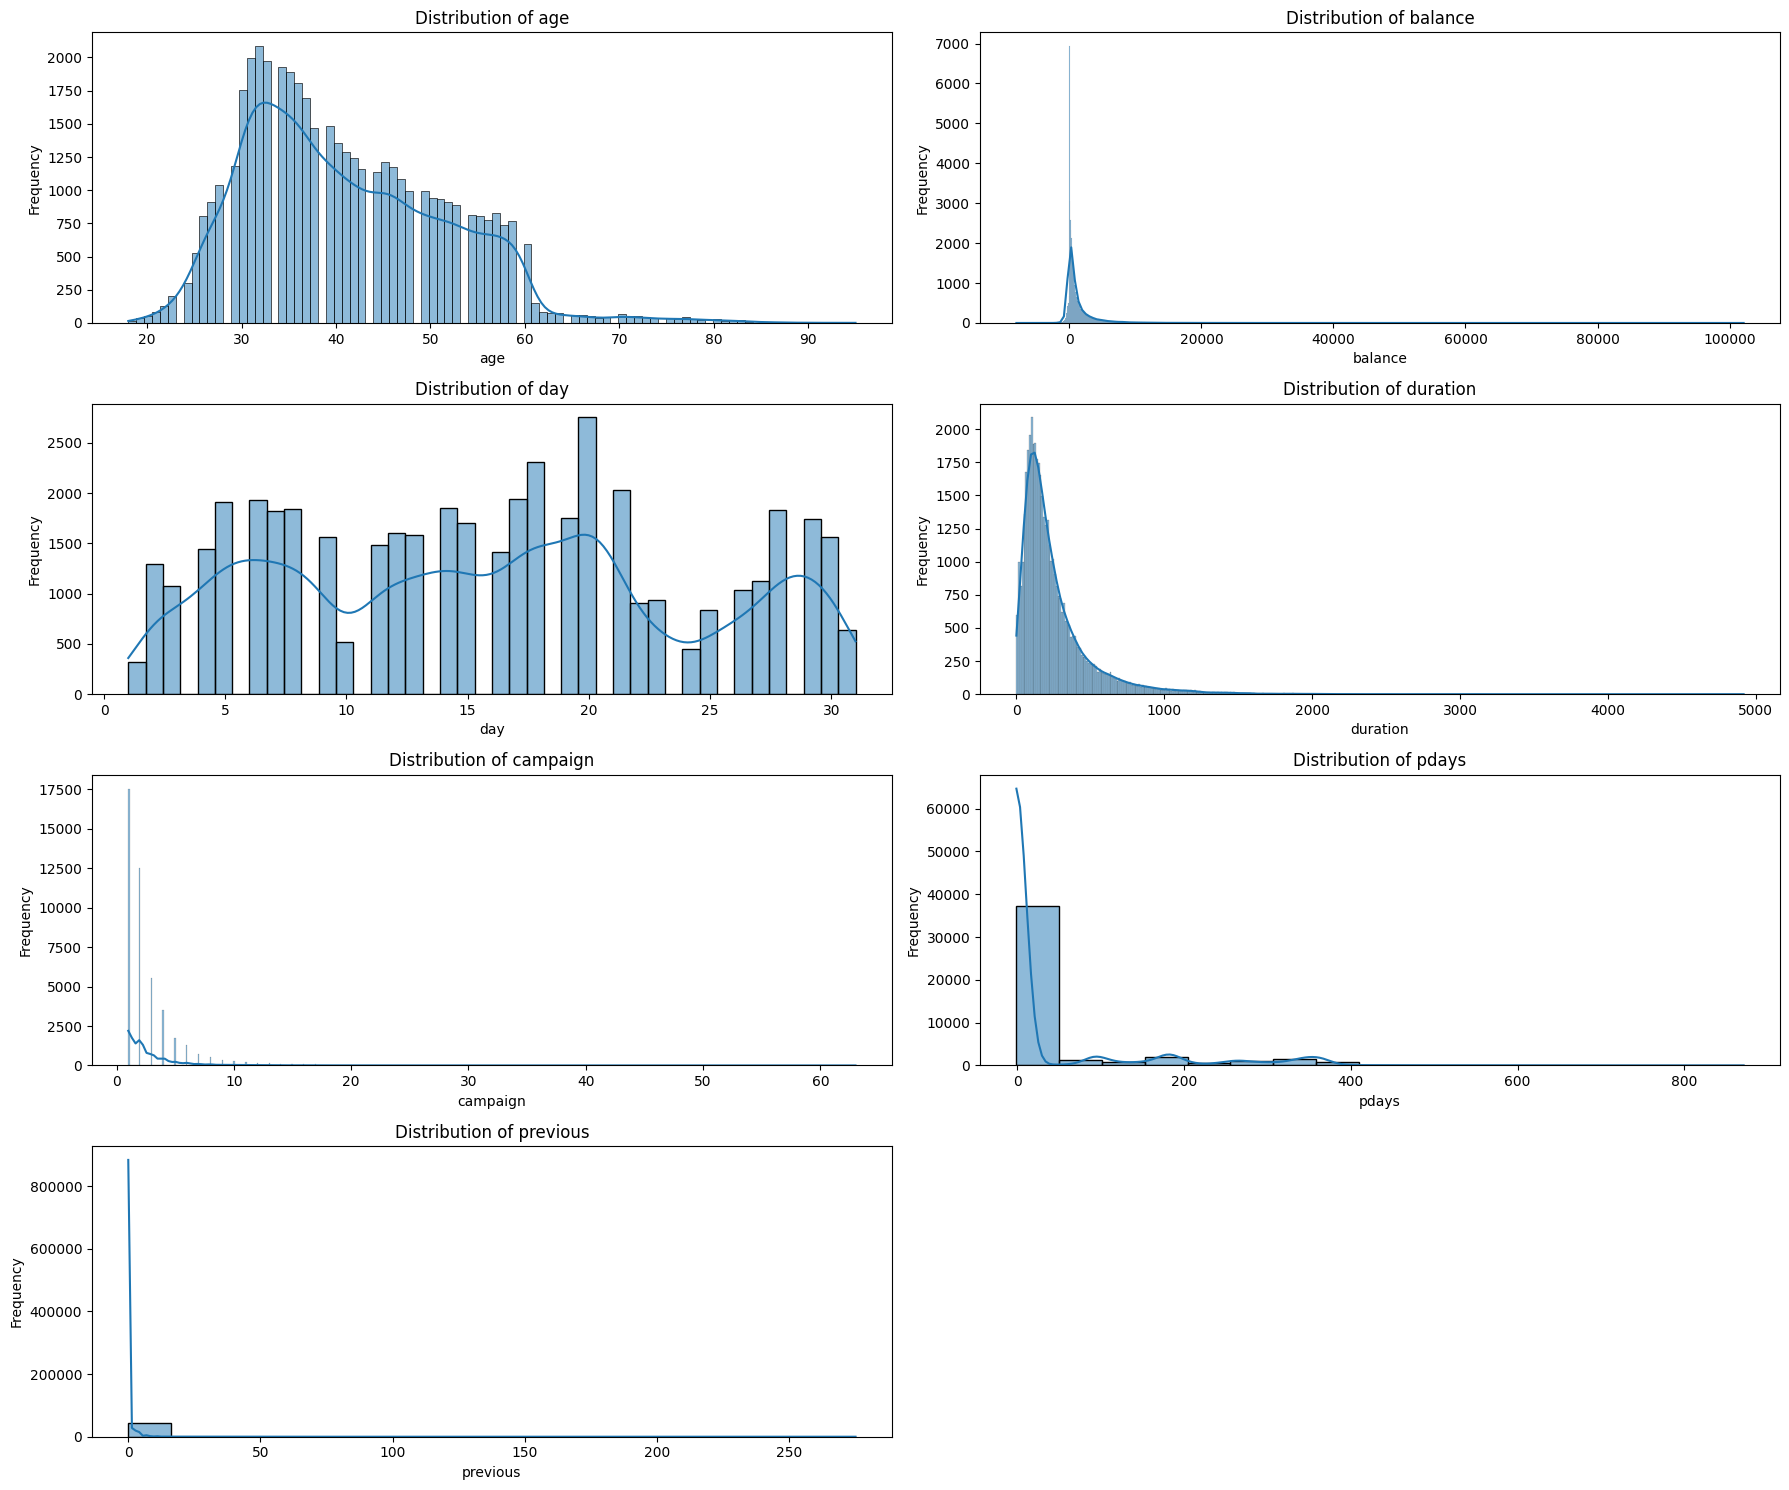

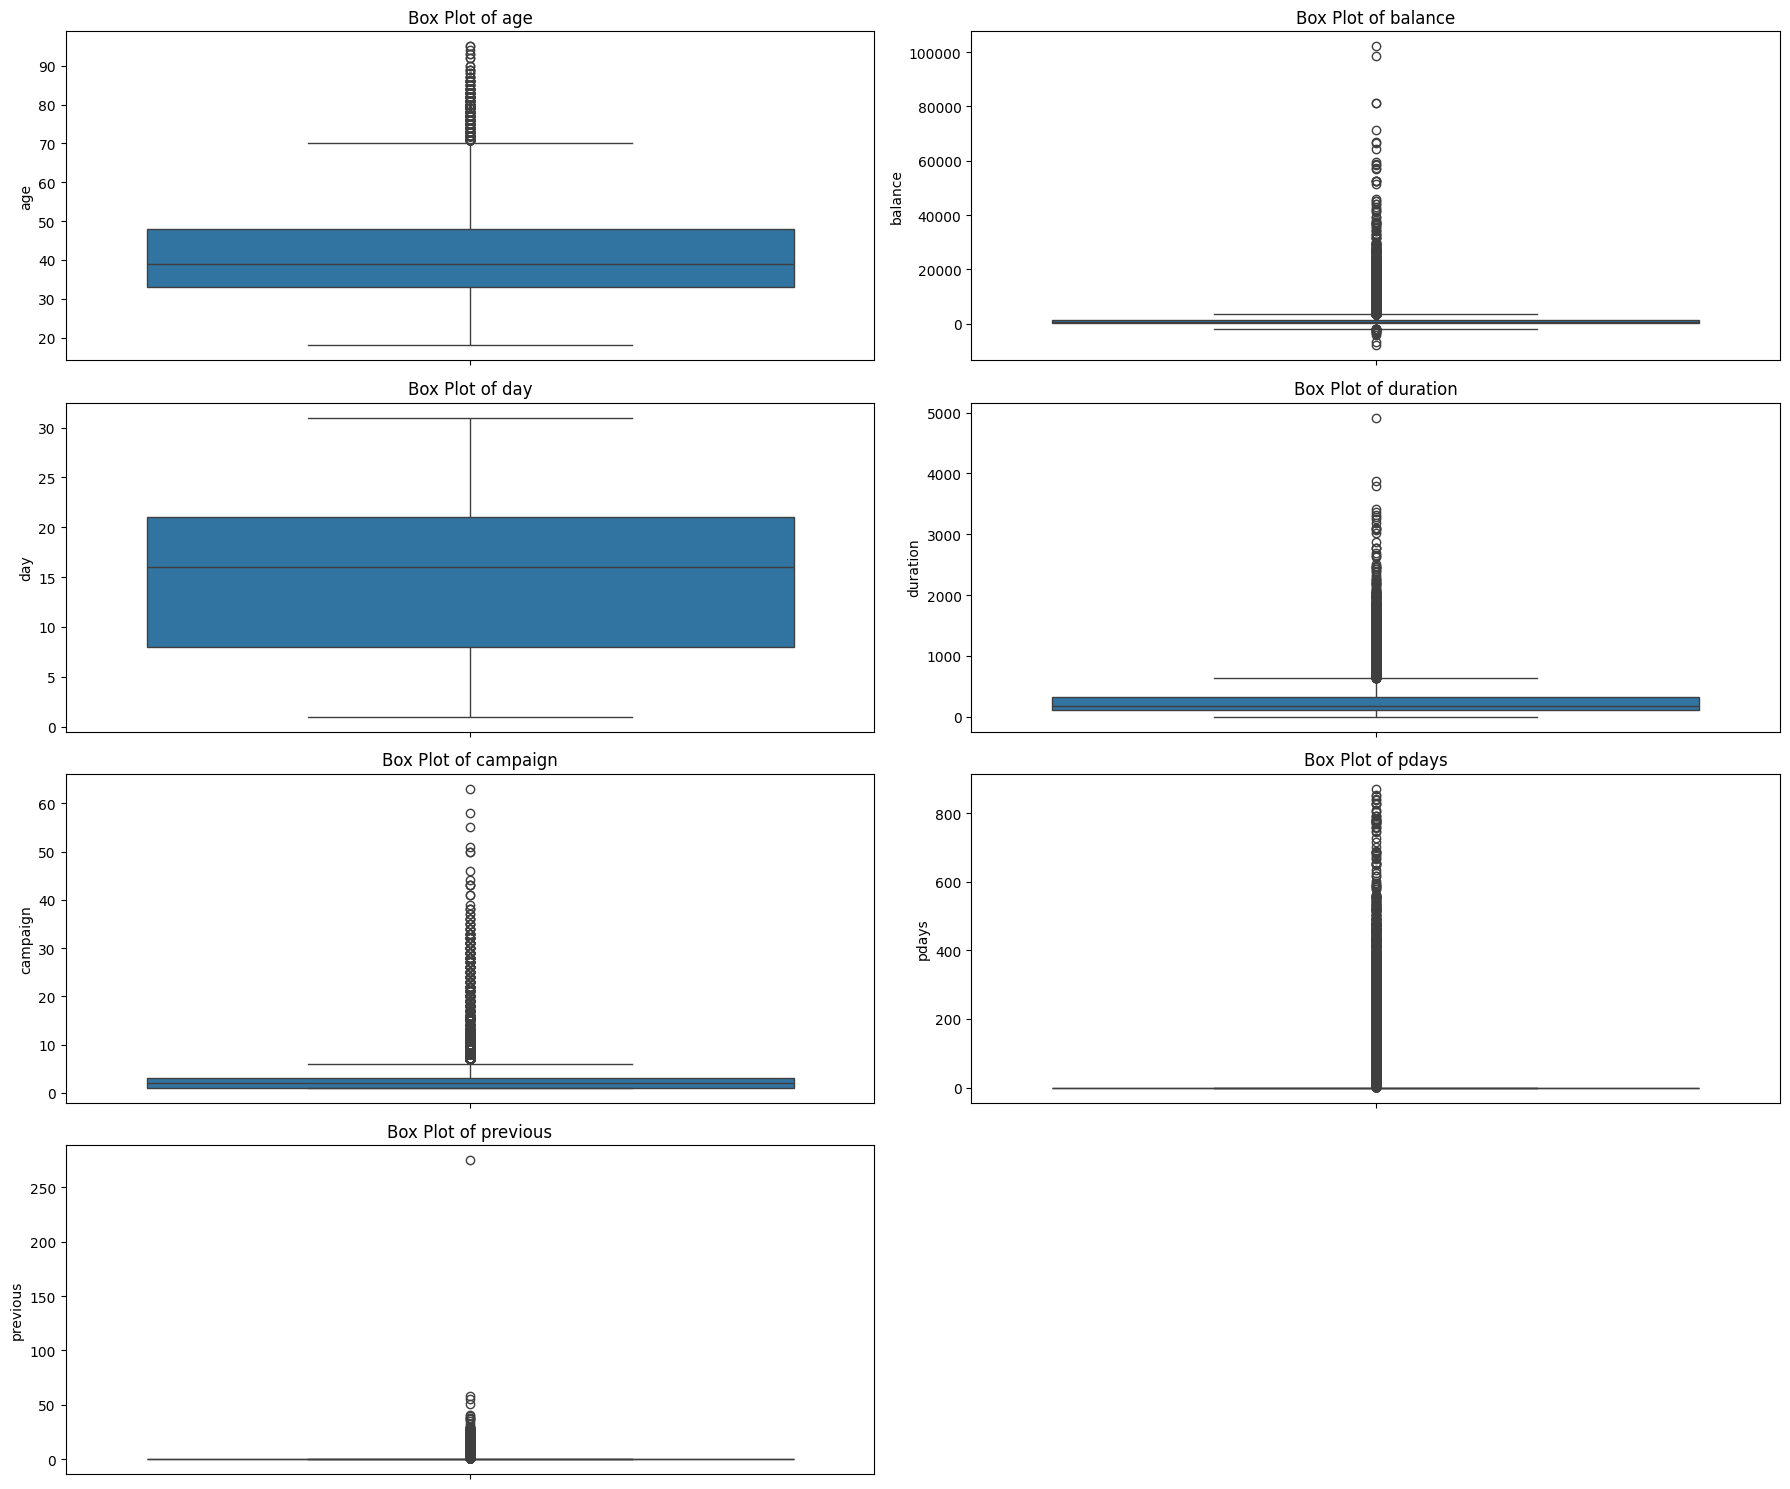

In [ ]:
# Univariate Analysis for Continuous Features
print("\n--- Univariate Analysis for Continuous Features ---")

plt.figure(figsize=(18, 15))
for i, col in enumerate(continuous_feature):
    plt.subplot(4, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 15))
for i, col in enumerate(continuous_feature):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()



--- Univariate Analysis for Categorical Features ---


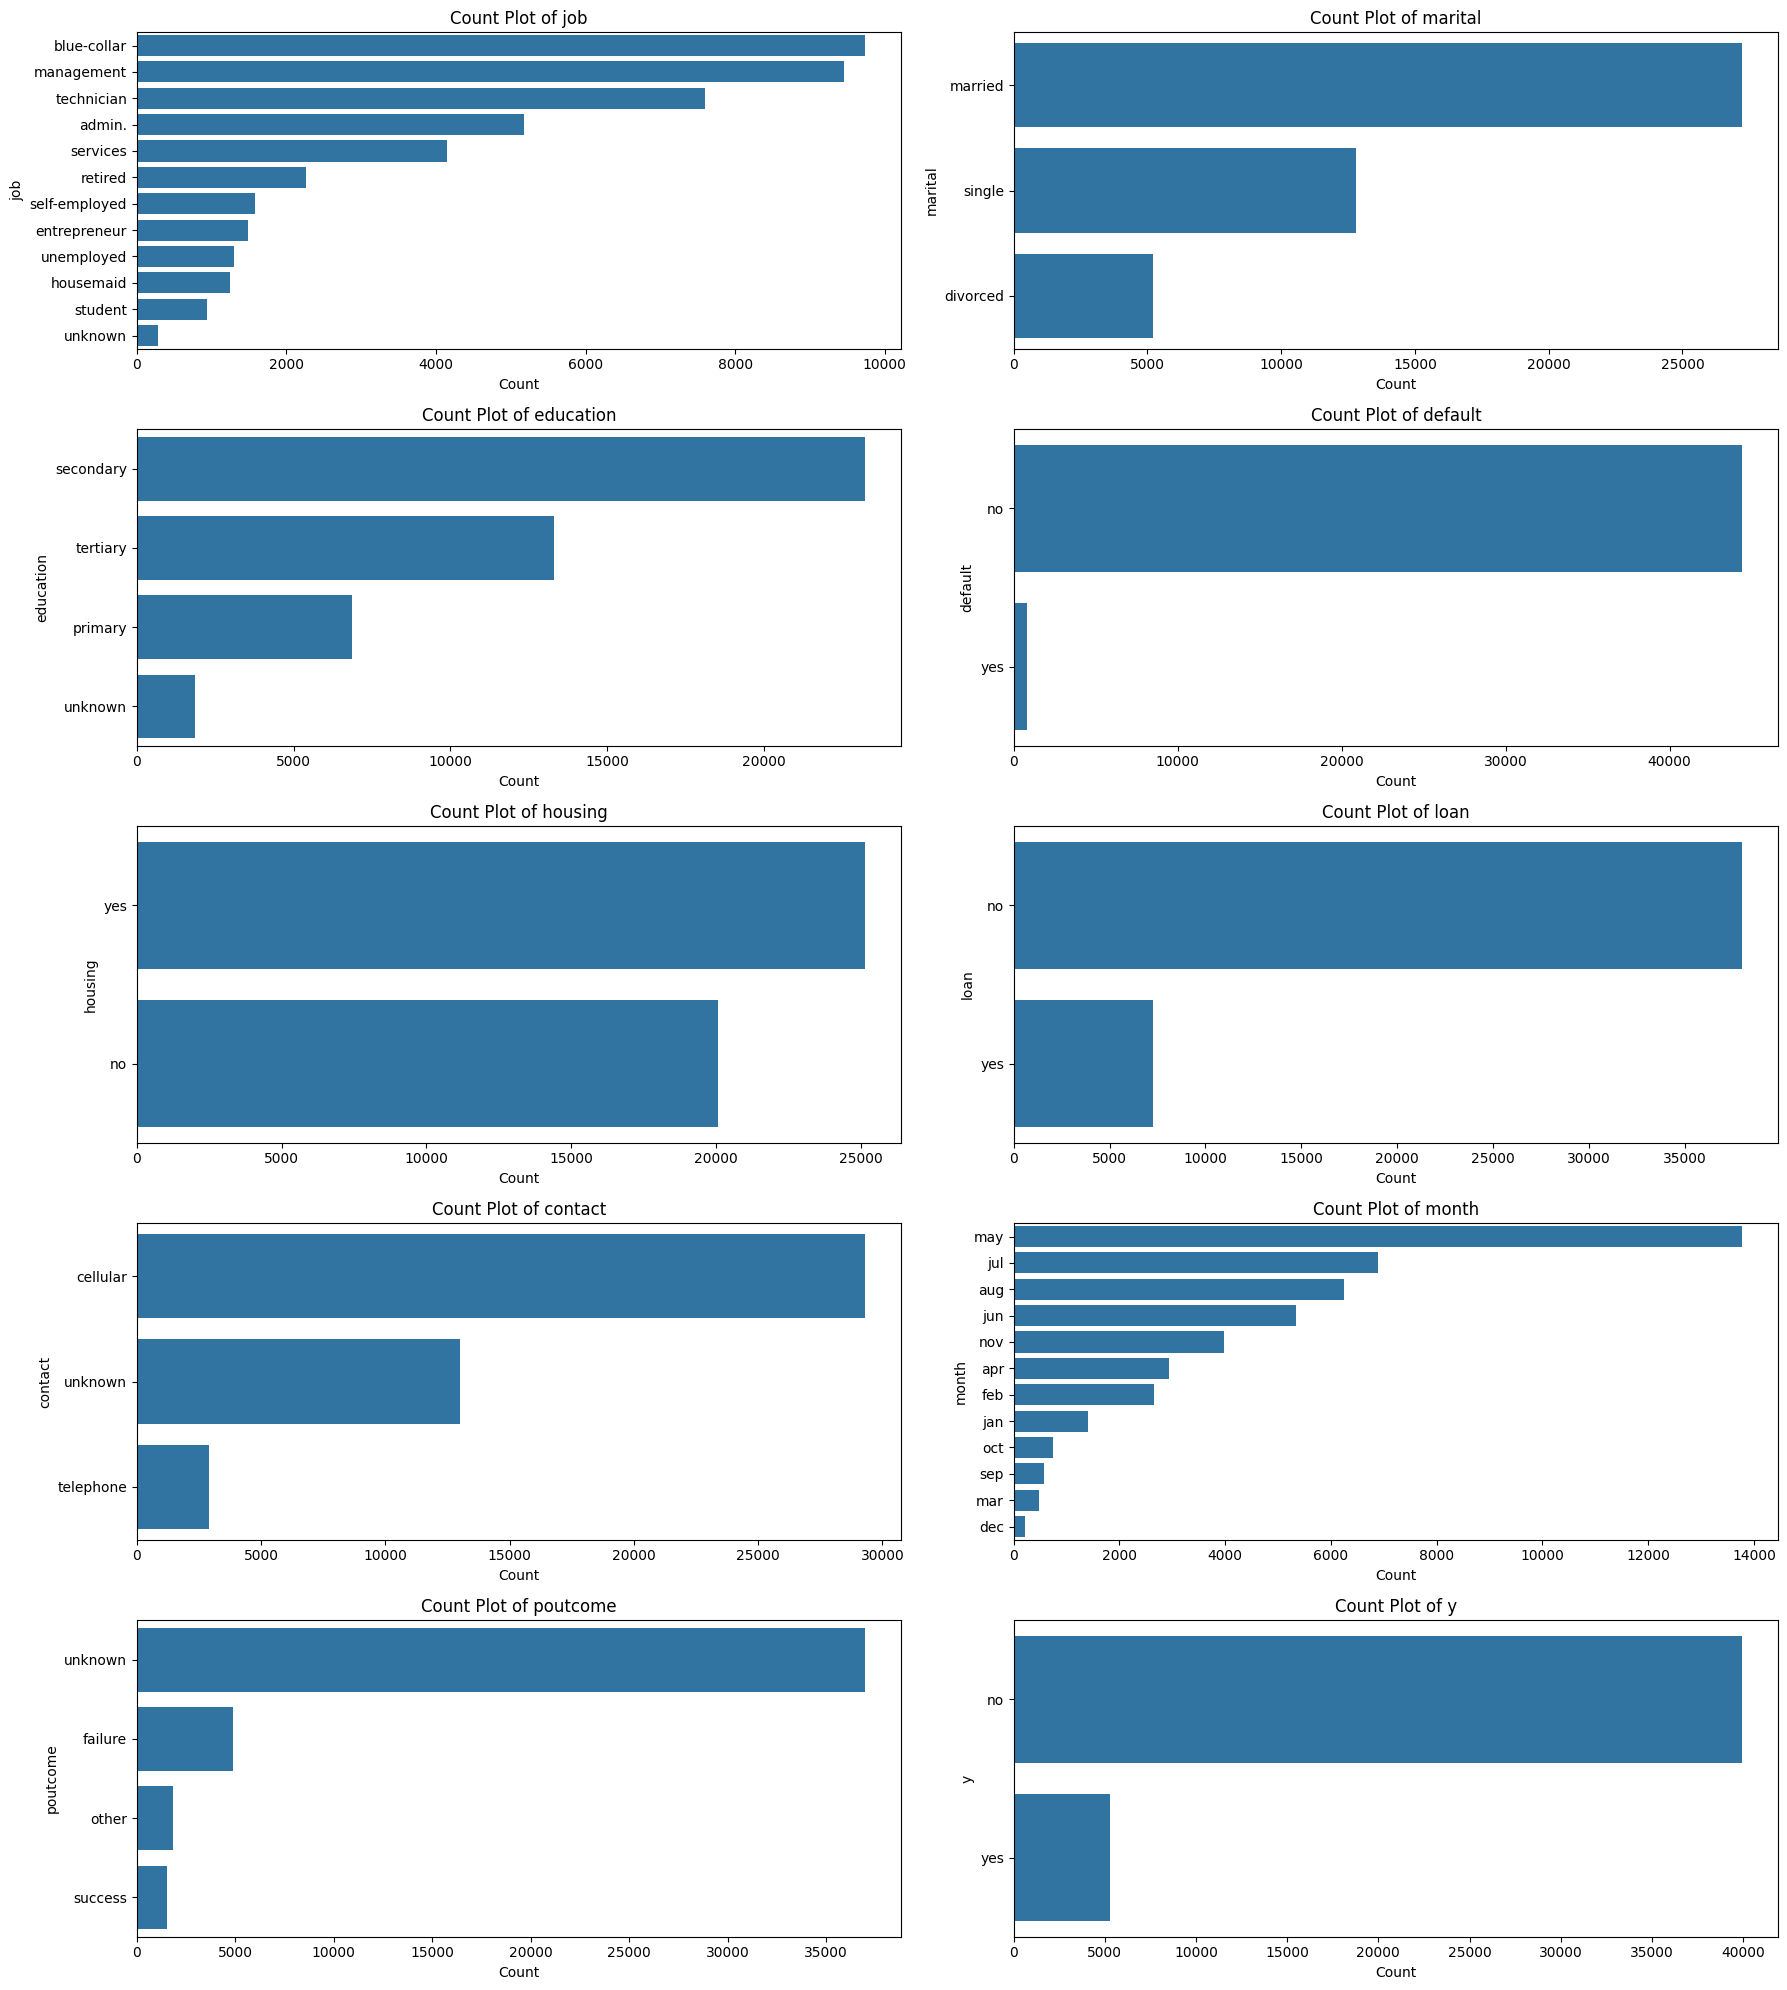


--- Value Counts for Categorical Features ---

Value counts for 'job':


,count
job,
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303



Value counts for 'marital':


,count
marital,
married,27214
single,12790
divorced,5207



Value counts for 'education':


,count
education,
secondary,23202
tertiary,13301
primary,6851
unknown,1857



Value counts for 'default':


,count
default,
no,44396
yes,815



Value counts for 'housing':


,count
housing,
yes,25130
no,20081



Value counts for 'loan':


,count
loan,
no,37967
yes,7244



Value counts for 'contact':


,count
contact,
cellular,29285
unknown,13020
telephone,2906



Value counts for 'month':


,count
month,
may,13766
jul,6895
aug,6247
jun,5341
nov,3970
apr,2932
feb,2649
jan,1403
oct,738



Value counts for 'poutcome':


,count
poutcome,
unknown,36959
failure,4901
other,1840
success,1511



Value counts for 'y':


,count
y,
no,39922
yes,5289


In [ ]:
# Univariate Analysis for Categorical Features
print("\n--- Univariate Analysis for Categorical Features ---")

plt.figure(figsize=(18, 20))
for i, col in enumerate(categorical_feature):
    plt.subplot(5, 2, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Display value counts for categorical features
print("\n--- Value Counts for Categorical Features ---")
for col in categorical_feature:
    print(f"\nValue counts for '{col}':")
    display(df[col].value_counts())


### Bivariate Analysis


--- Bivariate Analysis: Continuous Features vs. Target Variable 'y' ---


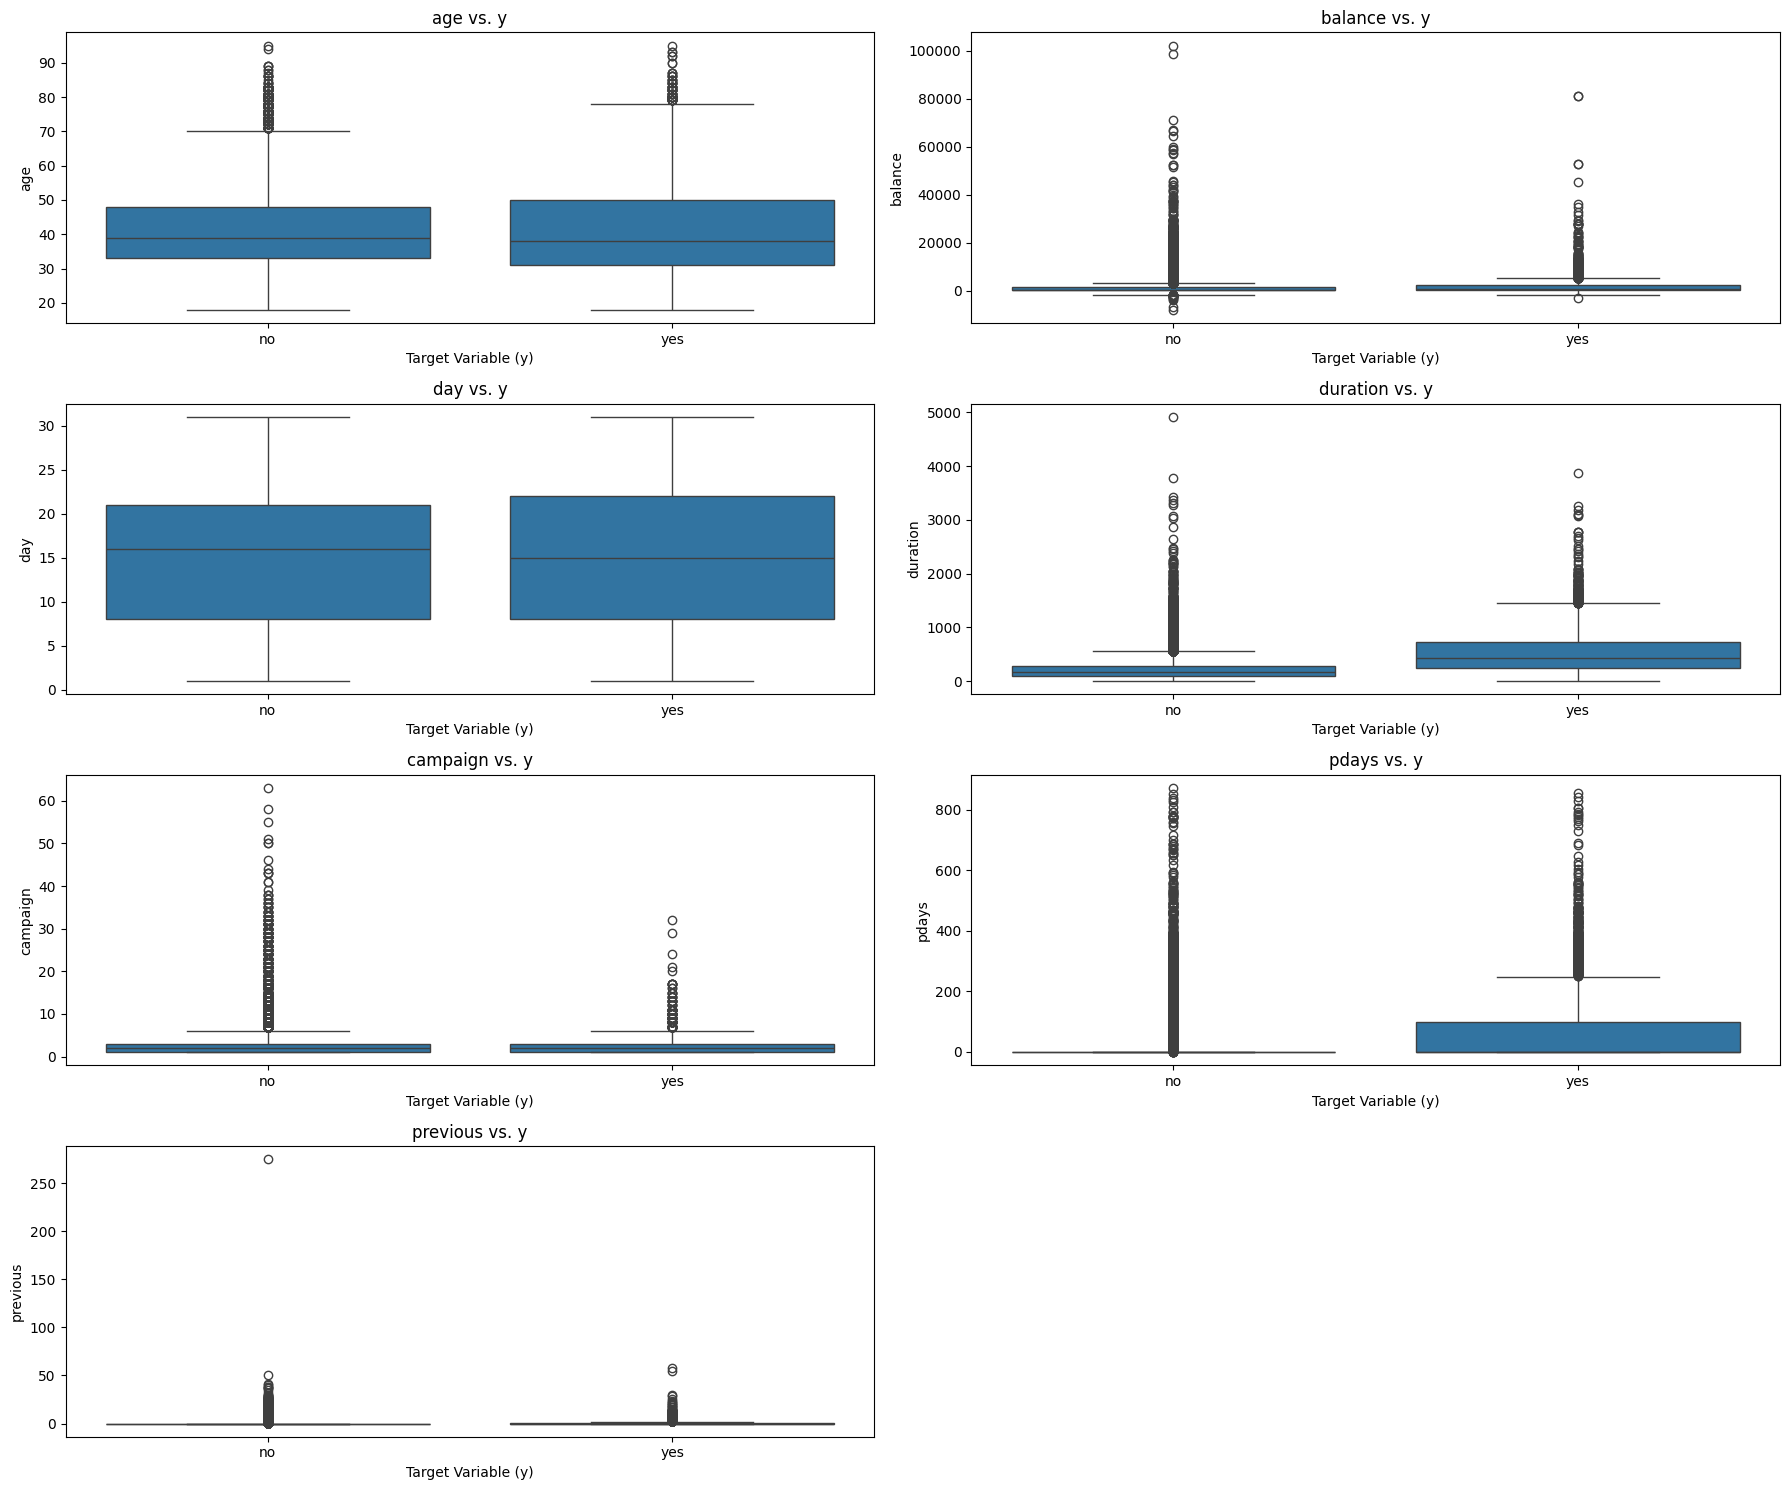

In [ ]:
# Bivariate Analysis: Continuous Features vs. Target Variable 'y'
print("\n--- Bivariate Analysis: Continuous Features vs. Target Variable 'y' ---")

plt.figure(figsize=(18, 15))
for i, col in enumerate(continuous_feature):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'{col} vs. y')
    plt.xlabel('Target Variable (y)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()



--- Bivariate Analysis: Categorical Features vs. Target Variable 'y' ---


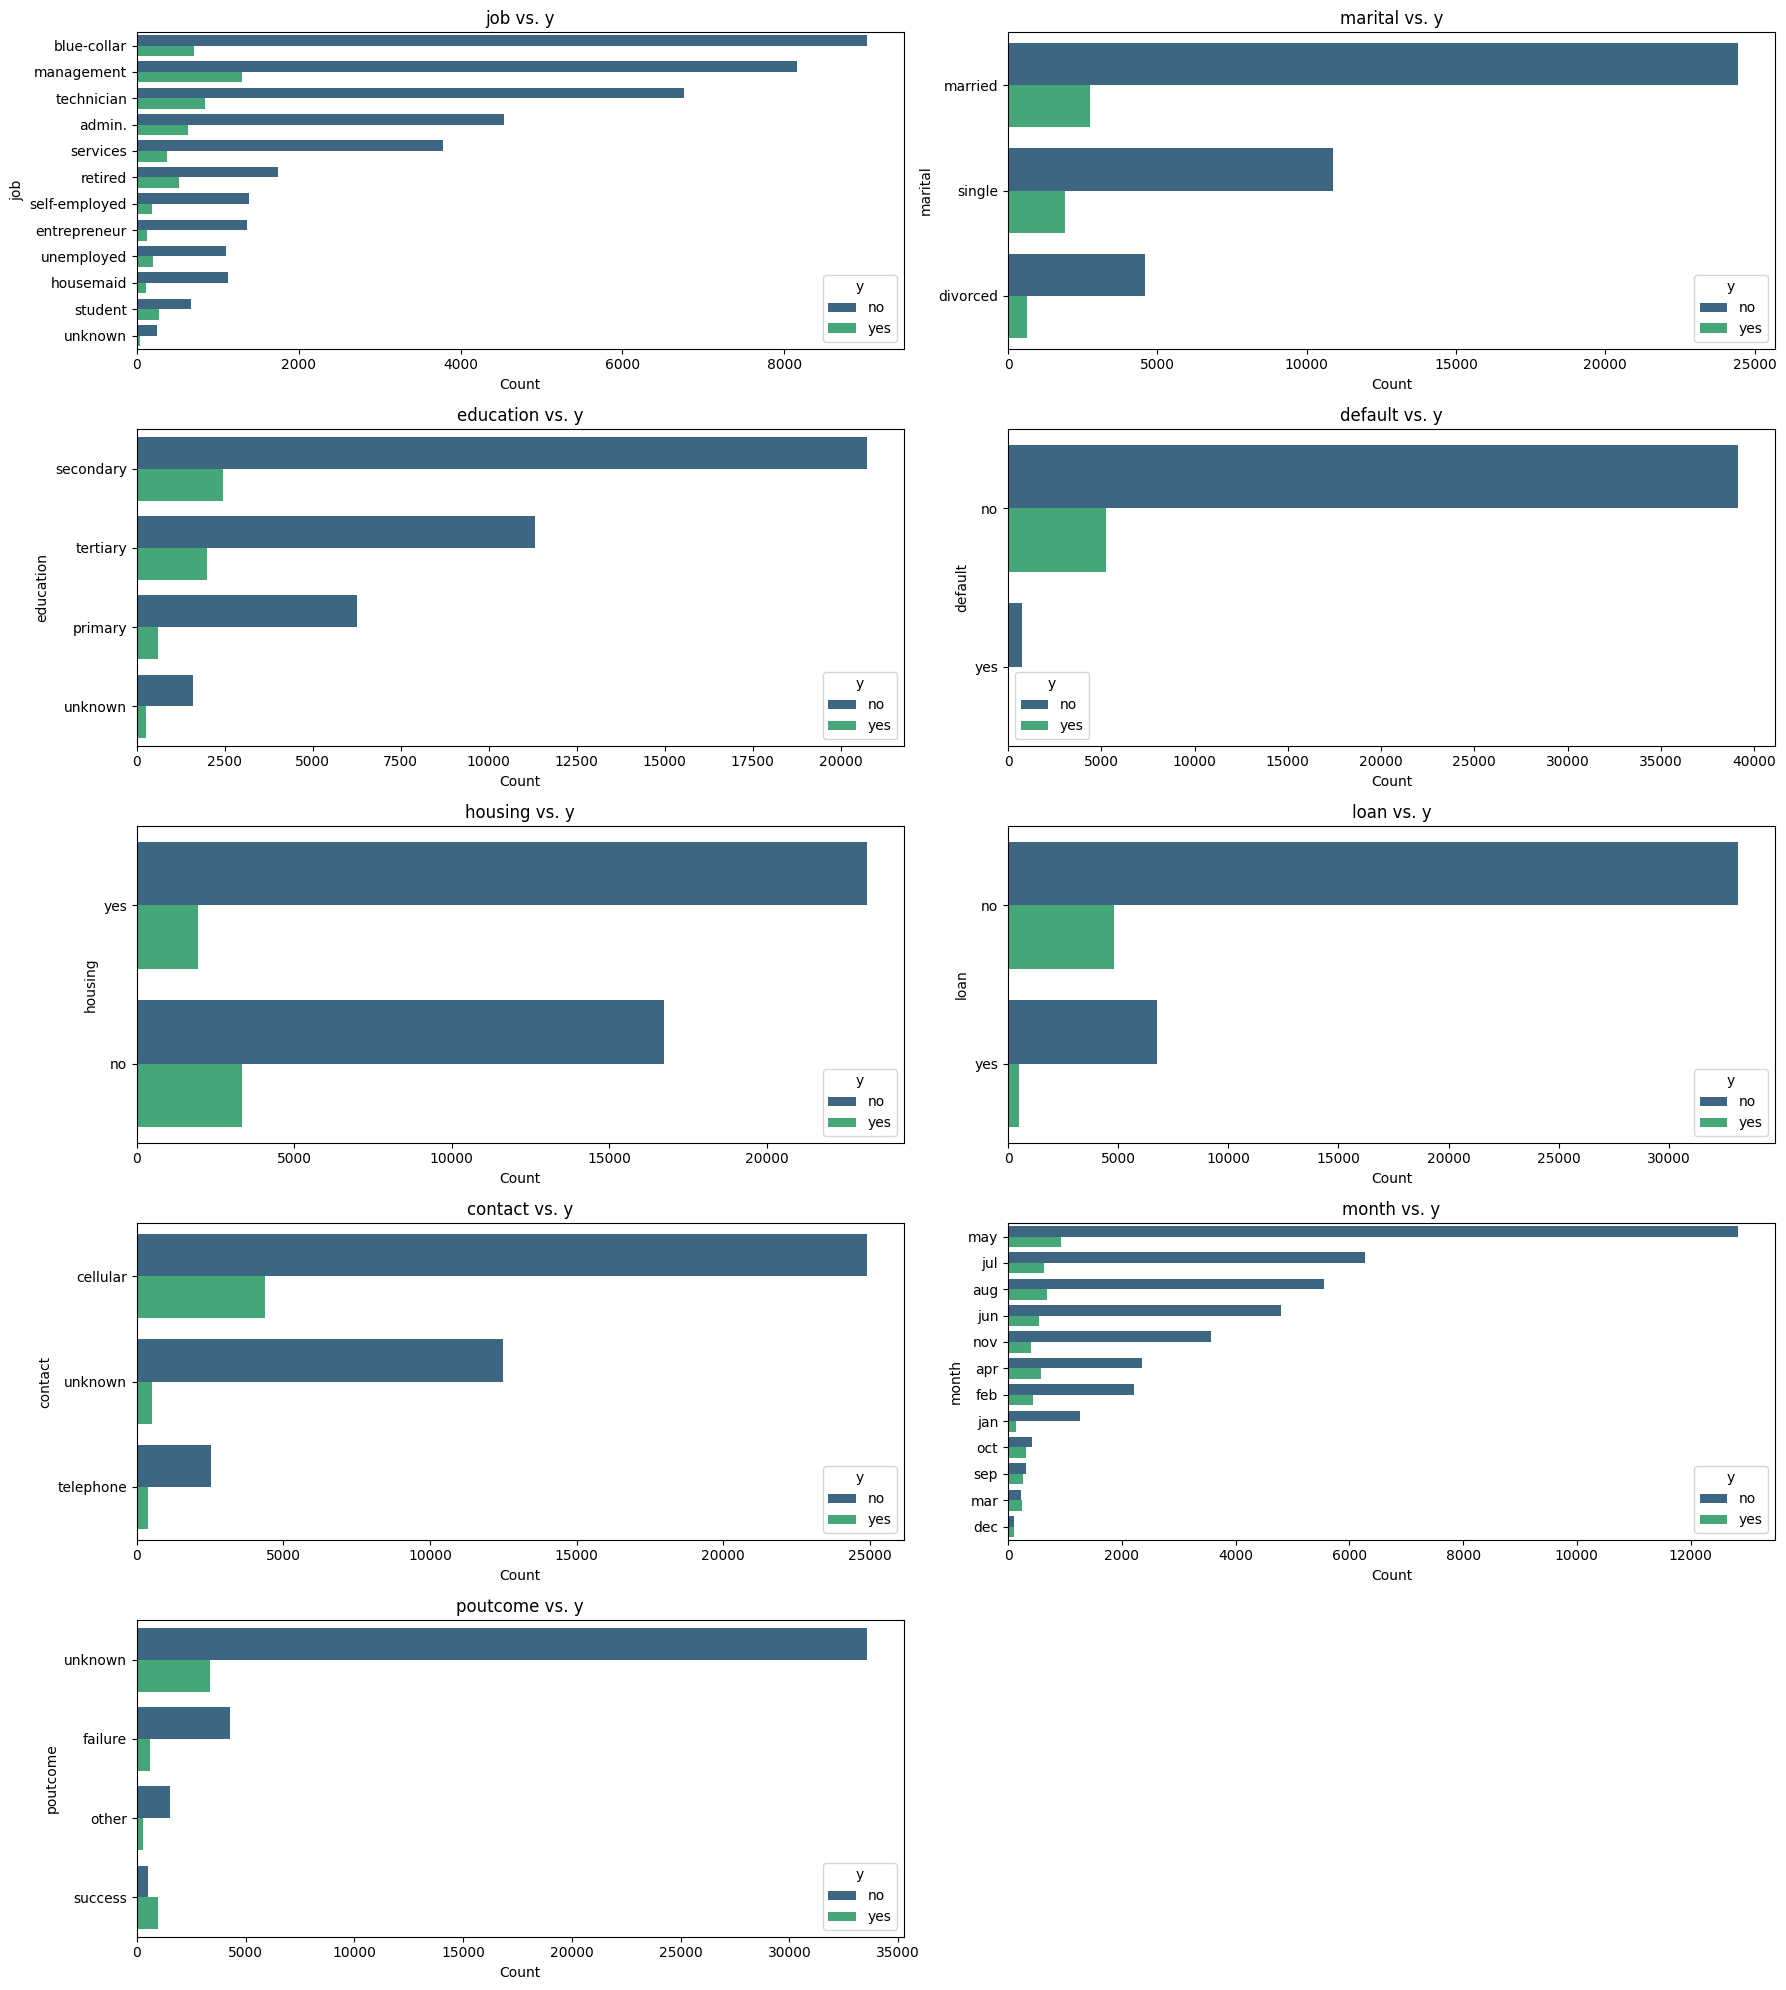

In [ ]:
# Bivariate Analysis: Categorical Features vs. Target Variable 'y'
print("\n--- Bivariate Analysis: Categorical Features vs. Target Variable 'y' ---")

plt.figure(figsize=(18, 20))
for i, col in enumerate(categorical_feature):
    if col != 'y': # Skip target variable itself
        plt.subplot(5, 2, i + 1)
        sns.countplot(y=col, hue='y', data=df, order=df[col].value_counts().index, palette='viridis')
        plt.title(f'{col} vs. y')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.legend(title='y')
plt.tight_layout()
plt.show()


### Multivariate Analysis


--- Multivariate Analysis: Correlation Heatmap of Continuous Features ---


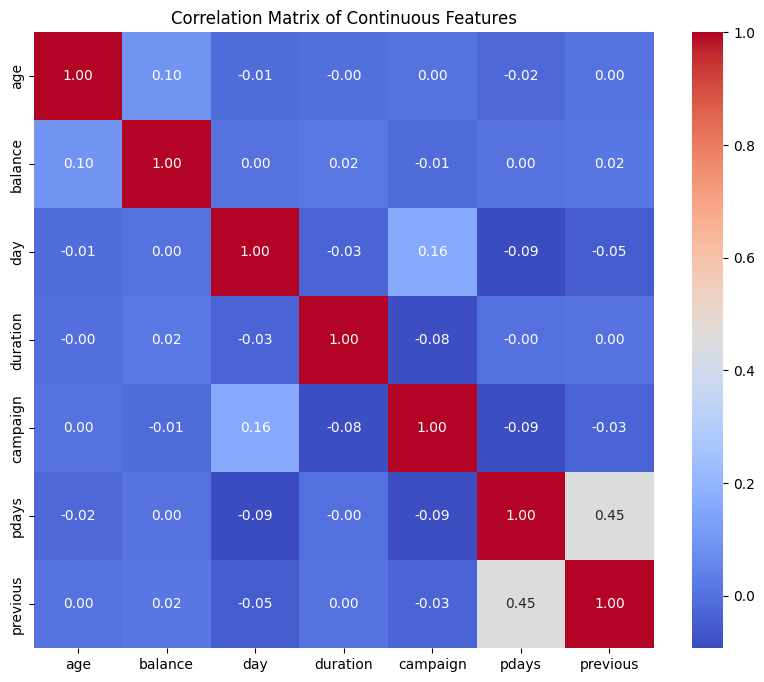

In [ ]:
# Multivariate Analysis: Correlation Heatmap of Continuous Features
print("\n--- Multivariate Analysis: Correlation Heatmap of Continuous Features ---")

plt.figure(figsize=(10, 8))
sns.heatmap(df[continuous_feature].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Continuous Features')
plt.show()


## **Features Engineering**

In [ ]:
df['is_default'] = df['default'].apply(lambda row: 1 if row == 'yes' else 0 )

 one-hot encoding for non-numeric MARITAL column

In [ ]:
# One-hot encoding for non-numeric 'marital' column
marital_dummies = pd.get_dummies(df['marital'], prefix='marital')

# Convert 1/0
marital_dummies = marital_dummies.astype(int)

marital_dummies.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [ ]:
# merge marital_dummies with marital column
pd.concat([df['marital'], marital_dummies], axis = 1).head()

,marital,marital_divorced,marital_married,marital_single
0,married,0,1,0
1,single,0,0,1
2,married,0,1,0
3,married,0,1,0
4,single,0,0,1


In [ ]:
# Remove marital_divorced column
marital_dummies.drop('marital_divorced', axis =1, inplace = True)
marital_dummies.head()

,marital_married,marital_single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [ ]:
# merge marital_dummies into main dataframe
df = pd.concat([df, marital_dummies], axis = 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,is_default,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,0,1


one hot encoding for JOB column

In [ ]:
# One-hot encoding for non-numeric 'job' column
job_dummies = pd.get_dummies(df['job'], prefix='job')
job_dummies = job_dummies.astype(int)
job_dummies.head()


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Remove job_admin column
job_dummies.drop('job_admin.', axis=1, inplace=True, errors='ignore')

In [ ]:
# Merge job_dummies into main dataframe
df = pd.concat([df, job_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


one hot encoding for EDUCATION column

In [ ]:
education_dummies = pd.get_dummies(df['education'], prefix='education')
education_dummies = education_dummies.astype(int)
education_dummies.head()


,education_primary,education_secondary,education_tertiary,education_unknown
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1


In [ ]:
# Remove education_primary column safely
if 'education_primary' in education_dummies.columns:
    education_dummies.drop('education_primary', axis=1, inplace=True)

education_dummies.head()


,education_secondary,education_tertiary,education_unknown
0,0,1,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1


In [ ]:
# Merge education_dummies into main dataframe
df = pd.concat([df, education_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,1,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1


one hot encoding for CONTACT column

In [ ]:
# One-hot encoding for non-numeric 'contact' column
contact_dummies = pd.get_dummies(df['contact'], prefix='contact')
contact_dummies = contact_dummies.astype(int)
contact_dummies.head()

,contact_cellular,contact_telephone,contact_unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
# Remove 'contact_cellular' column to avoid multicollinearity
# Using errors='ignore' in case it's already dropped or not the reference category
contact_dummies.drop('contact_cellular', axis=1, inplace=True, errors='ignore')
contact_dummies.head()

,contact_telephone,contact_unknown
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
# Merge contact_dummies into main dataframe
df = pd.concat([df, contact_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,1,0,0,1,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,1,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,1,0,0,1,0,1


one hot encoding for POUTCOME column

In [ ]:
# One-hot encoding for non-numeric 'poutcome' column
poutcome_dummies = pd.get_dummies(df['poutcome'], prefix='poutcome')
poutcome_dummies = poutcome_dummies.astype(int)
poutcome_dummies.head()

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
# Remove one 'poutcome' column to avoid multicollinearity (e.g., 'poutcome_unknown')
poutcome_dummies.drop('poutcome_unknown', axis=1, inplace=True, errors='ignore')
poutcome_dummies.head()

,poutcome_failure,poutcome_other,poutcome_success
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
# Merge poutcome_dummies into main dataframe
df = pd.concat([df, poutcome_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,1,0,0,1,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,1,0,0,0,1,0,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,1,0,0,0,1,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,1,0,1,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,1,0,0,1,0,1,0,0,0


### Convert 'month' column to numeric values

In [ ]:
# Create a dictionary to map month names to numbers
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Apply the mapping to the 'month' column
df['month_numeric'] = df['month'].map(month_mapping)

# Optionally, drop the original 'month' column if no longer needed
df = df.drop('month', axis=1)

print("Month column converted to numeric and original column dropped.")
display(df[['month_numeric']].head())
df.info()

Month column converted to numeric and original column dropped.


,month_numeric
0,5
1,5
2,5
3,5
4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   job                  45211 non-null  object
 2   marital              45211 non-null  object
 3   education            45211 non-null  object
 4   default              45211 non-null  object
 5   balance              45211 non-null  int64 
 6   housing              45211 non-null  object
 7   loan                 45211 non-null  object
 8   contact              45211 non-null  object
 9   day                  45211 non-null  int64 
 10  duration             45211 non-null  int64 
 11  campaign             45211 non-null  int64 
 12  pdays                45211 non-null  int64 
 13  previous             45211 non-null  int64 
 14  poutcome             45211 non-null  object
 15  y                    45211 non-null  object
 16  is_d

In [ ]:
df[df['pdays'] == -1]['pdays'].count()

np.int64(36954)

In [ ]:
df['was_contacted'] = df['pdays'].apply(lambda row: 0 if row == -1 else 1)
df[['pdays','was_contacted']].head()

,pdays,was_contacted
0,-1,0
1,-1,0
2,-1,0
3,-1,0
4,-1,0


Convert default column into numeric value

In [ ]:
df['is_default'] = df['default'].apply(lambda row: 1 if row == 'yes' else 0 )

In [ ]:
# Veiw default and is_default columns together

df[['default', 'is_default']].tail()

,default,is_default
45206,no,0
45207,no,0
45208,no,0
45209,no,0
45210,no,0


### Convert 'housing' column to numeric values

In [ ]:
# Convert 'housing' column to numeric (1 for 'yes', 0 for 'no')
df['is_housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)

# Drop the original 'housing' column
df = df.drop('housing', axis=1)

print("Housing column converted to numeric 'is_housing' and original column dropped.")
display(df[['is_housing']].head())
df.info()

Housing column converted to numeric 'is_housing' and original column dropped.


,is_housing
0,1
1,1
2,1
3,1
4,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   job                  45211 non-null  object
 2   marital              45211 non-null  object
 3   education            45211 non-null  object
 4   default              45211 non-null  object
 5   balance              45211 non-null  int64 
 6   loan                 45211 non-null  object
 7   contact              45211 non-null  object
 8   day                  45211 non-null  int64 
 9   duration             45211 non-null  int64 
 10  campaign             45211 non-null  int64 
 11  pdays                45211 non-null  int64 
 12  previous             45211 non-null  int64 
 13  poutcome             45211 non-null  object
 14  y                    45211 non-null  object
 15  is_default           45211 non-null  int64 
 16  mari

### Convert 'loan' column to numeric values

In [ ]:
# Convert 'loan' column to numeric (1 for 'yes', 0 for 'no')
df['is_loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

# Drop the original 'loan' column
df = df.drop('loan', axis=1)

print("Loan column converted to numeric 'is_loan' and original column dropped.")
display(df[['is_loan']].head())
df.info()

Loan column converted to numeric 'is_loan' and original column dropped.


,is_loan
0,0
1,0
2,1
3,0
4,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   job                  45211 non-null  object
 2   marital              45211 non-null  object
 3   education            45211 non-null  object
 4   default              45211 non-null  object
 5   balance              45211 non-null  int64 
 6   contact              45211 non-null  object
 7   day                  45211 non-null  int64 
 8   duration             45211 non-null  int64 
 9   campaign             45211 non-null  int64 
 10  pdays                45211 non-null  int64 
 11  previous             45211 non-null  int64 
 12  poutcome             45211 non-null  object
 13  y                    45211 non-null  object
 14  is_default           45211 non-null  int64 
 15  marital_married      45211 non-null  int64 
 16  mari

### Convert target column 'y' into numeric value

In [ ]:
# Convert 'y' column to numeric (1 for 'yes', 0 for 'no')
df['y'] = df['y'].map({'yes': 1, 'no': 0})

print("Target column 'y' converted to numeric.")
display(df[['y']].head())
df.info()

Target column 'y' converted to numeric.


,y
0,0
1,0
2,0
3,0
4,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   job                  45211 non-null  object
 2   marital              45211 non-null  object
 3   education            45211 non-null  object
 4   default              45211 non-null  object
 5   balance              45211 non-null  int64 
 6   contact              45211 non-null  object
 7   day                  45211 non-null  int64 
 8   duration             45211 non-null  int64 
 9   campaign             45211 non-null  int64 
 10  pdays                45211 non-null  int64 
 11  previous             45211 non-null  int64 
 12  poutcome             45211 non-null  object
 13  y                    45211 non-null  int64 
 14  is_default           45211 non-null  int64 
 15  marital_married      45211 non-null  int64 
 16  mari

In [ ]:
df.head()

,age,job,marital,education,default,balance,contact,day,duration,campaign,...,education_unknown,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,month_numeric,was_contacted,is_housing,is_loan
0,58,management,married,tertiary,no,2143,unknown,5,261,1,...,0,0,1,0,0,0,5,0,1,0
1,44,technician,single,secondary,no,29,unknown,5,151,1,...,0,0,1,0,0,0,5,0,1,0
2,33,entrepreneur,married,secondary,no,2,unknown,5,76,1,...,0,0,1,0,0,0,5,0,1,1
3,47,blue-collar,married,unknown,no,1506,unknown,5,92,1,...,1,0,1,0,0,0,5,0,1,0
4,33,unknown,single,unknown,no,1,unknown,5,198,1,...,1,0,1,0,0,0,5,0,0,0


### Deleting original categorical and other specified columns

In [ ]:
df.drop(['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y','month','duration','age','day'], axis=1, inplace=True, errors='ignore')
df.dtypes

,0
balance,int64
campaign,int64
pdays,int64
previous,int64
is_default,int64
marital_married,int64
marital_single,int64
job_blue-collar,int64
job_entrepreneur,int64
job_housemaid,int64


In [ ]:
df.shape

(45211, 30)

In [ ]:
X = df.copy()
X.head()

,balance,campaign,pdays,previous,is_default,marital_married,marital_single,job_blue-collar,job_entrepreneur,job_housemaid,...,education_unknown,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,month_numeric,was_contacted,is_housing,is_loan
0,2143,1,-1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,5,0,1,0
1,29,1,-1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,5,0,1,0
2,2,1,-1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,5,0,1,1
3,1506,1,-1,0,0,1,0,1,0,0,...,1,0,1,0,0,0,5,0,1,0
4,1,1,-1,0,0,0,1,0,0,0,...,1,0,1,0,0,0,5,0,0,0


In [ ]:
y = data['y'].map({'yes': 1, 'no': 0})
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Over sampling the data using SMOTE
sampler = SMOTE()
X,y = sampler.fit_resample(X.values, y.values)

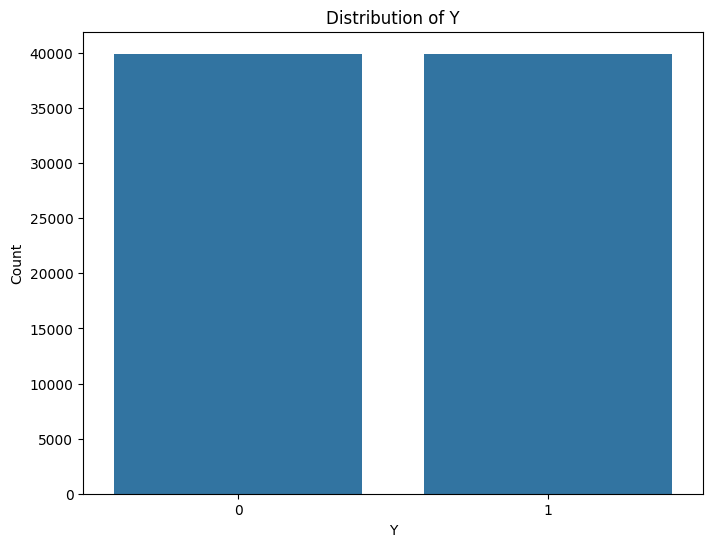

In [ ]:
# countplot of dependent column y

plt.figure(figsize = (8,6))
sns.countplot(x = y)
plt.xlabel('Y')
plt.ylabel('Count')
plt.title('Distribution of Y')
plt.show()

**Train-Test Split**

In [ ]:
# Scale the data using Standard Scaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [ ]:
# Split the data into train and test split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.30, random_state =42)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(55890, 30) (55890,)
(23954, 30) (23954,)


**MODEL**

##Logistic Regression model

In [ ]:
# fitting model to logistic regression
log_model = LogisticRegression(fit_intercept = True, max_iter = 10000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# get the model coefficients
log_model.coef_

array([[ 0.08391274, -0.40947356,  0.07604975,  0.08553905, -0.086179  ,
        -0.72292476, -0.55853036, -0.92047096, -0.41104379, -0.50224919,
        -0.77792192, -0.46254585, -0.38509299, -0.5827151 , -0.21724907,
        -0.73270091, -0.39558314, -0.17820971, -0.77226595, -0.49196533,
        -0.29569197, -0.20911337, -0.70878004, -1.6907495 , -1.01371387,
        -0.8573308 , -0.18833715,  2.40181747, -0.53402456, -0.38526804]])

In [ ]:
#Get the model intercept
log_model.intercept_

array([0.51246197])

In [ ]:
#Get the predicted probabilities
train_preds = log_model.predict_proba(X_train)
test_preds = log_model.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_preds = log_model.predict(X_train)
test_class_preds = log_model.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.879495437466452
The accuracy on test data is  0.8750521833514235


Confusion Matrix:
 [[25345  2604]
 [ 4131 23810]]


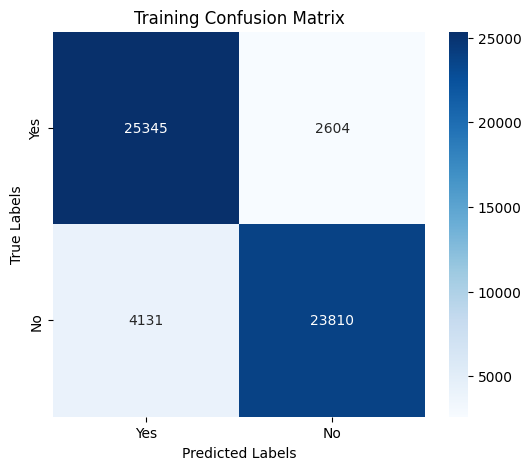

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# train_class_preds = model.predict(X_train)
labels = ['Yes', 'No']

# Confusion matrix তৈরি
cm = confusion_matrix(y_train, train_class_preds)
print("Confusion Matrix:\n", cm)

# Heatmap plot
plt.figure(figsize=(6,5))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Labels, title, ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Training Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()


Test Confusion Matrix:
 [[10813  1160]
 [ 1833 10148]]


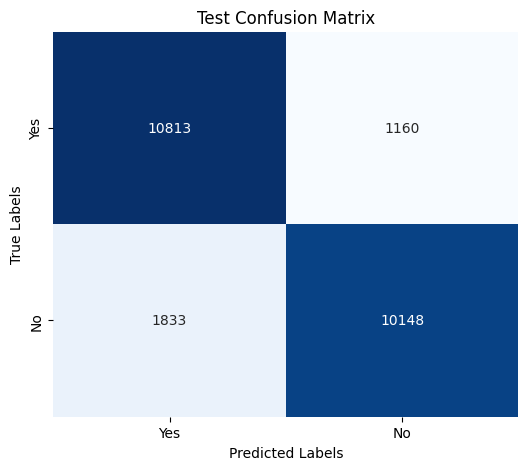

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# test_class_preds = model.predict(X_test)
labels = ['Yes', 'No']

# Confusion matrix তৈরি
cm = confusion_matrix(y_test, test_class_preds)
print("Test Confusion Matrix:\n", cm)

# Heatmap plot
plt.figure(figsize=(6,5))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Labels, title, ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Test Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()


In [ ]:
log_train_preds = log_model.predict_proba(X_train)[:,1]
log_test_preds = log_model.predict_proba(X_test)[:,1]

In [ ]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,log_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,log_test_preds))

Train ROC-AUC score :  0.9411086573580519
Test ROC-AUC score :  0.9383512989082013


In [ ]:
# Classification Report

from sklearn.metrics import classification_report

target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.91      0.86      0.88     29476
          no       0.85      0.90      0.88     26414

    accuracy                           0.88     55890
   macro avg       0.88      0.88      0.88     55890
weighted avg       0.88      0.88      0.88     55890



              precision    recall  f1-score   support

         yes       0.90      0.86      0.88     12646
          no       0.85      0.90      0.87     11308

    accuracy                           0.88     23954
   macro avg       0.88      0.88      0.87     23954
weighted avg       0.88      0.88      0.88     23954



## Train XGBoost Classifier Model



In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost Classifier model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

print("XGBoost Classifier model trained successfully!")

XGBoost Classifier model trained successfully!


XGBoost Training Accuracy: 0.9222
XGBoost Test Accuracy: 0.9014
XGBoost Training ROC AUC: 0.9745
XGBoost Test ROC AUC: 0.9562

--- Classification Report for Training Data ---
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     27949
           1       0.94      0.90      0.92     27941

    accuracy                           0.92     55890
   macro avg       0.92      0.92      0.92     55890
weighted avg       0.92      0.92      0.92     55890


--- Classification Report for Test Data ---
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     11973
           1       0.92      0.88      0.90     11981

    accuracy                           0.90     23954
   macro avg       0.90      0.90      0.90     23954
weighted avg       0.90      0.90      0.90     23954



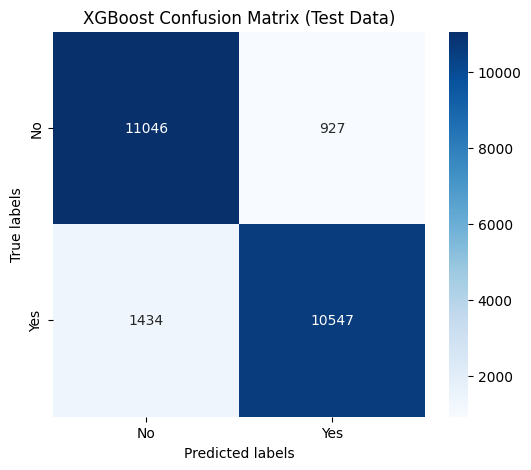

In [ ]:
import numpy as np

# Get predictions for training and test data
xgb_train_preds_proba = xgb_model.predict_proba(X_train)[:, 1]
xgb_test_preds_proba = xgb_model.predict_proba(X_test)[:, 1]

xgb_train_preds = xgb_model.predict(X_train)
xgb_test_preds = xgb_model.predict(X_test)

# Calculate accuracy scores
train_accuracy_xgb = accuracy_score(y_train, xgb_train_preds)
test_accuracy_xgb = accuracy_score(y_test, xgb_test_preds)

# Calculate ROC AUC scores
train_roc_auc_xgb = roc_auc_score(y_train, xgb_train_preds_proba)
test_roc_auc_xgb = roc_auc_score(y_test, xgb_test_preds_proba)

print(f"XGBoost Training Accuracy: {train_accuracy_xgb:.4f}")
print(f"XGBoost Test Accuracy: {test_accuracy_xgb:.4f}")
print(f"XGBoost Training ROC AUC: {train_roc_auc_xgb:.4f}")
print(f"XGBoost Test ROC AUC: {test_roc_auc_xgb:.4f}")

print("\n--- Classification Report for Training Data ---")
print(classification_report(y_train, xgb_train_preds))

print("\n--- Classification Report for Test Data ---")
print(classification_report(y_test, xgb_test_preds))

# Confusion matrix for test data
labels = ['No', 'Yes']
cm_xgb = confusion_matrix(y_test, xgb_test_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('XGBoost Confusion Matrix (Test Data)')
plt.show()


##Training Random Forest Classifier model

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print('Training Random Forest Classifier...')
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

# Get probabilities for ROC AUC
rf_train_preds_proba = rf_model.predict_proba(X_train)[:, 1]
rf_test_preds_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
rf_train_accuracy = accuracy_score(y_train, rf_train_preds)
rf_test_accuracy = accuracy_score(y_test, rf_test_preds)

# Calculate ROC AUC
rf_train_roc_auc = roc_auc_score(y_train, rf_train_preds_proba)
rf_test_roc_auc = roc_auc_score(y_test, rf_test_preds_proba)

# Print accuracy & ROC AUC
print(f"\nRandom Forest Training Accuracy: {rf_train_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.4f}")
print(f"Random Forest Training ROC AUC: {rf_train_roc_auc:.4f}")
print(f"Random Forest Test ROC AUC: {rf_test_roc_auc:.4f}\n")

# Classification Reports
print('--- Classification Report for Training Data ---')
print(classification_report(y_train, rf_train_preds))

print('--- Classification Report for Test Data ---')
print(classification_report(y_test, rf_test_preds))


Training Random Forest Classifier...

Random Forest Training Accuracy: 0.9972
Random Forest Test Accuracy: 0.9064
Random Forest Training ROC AUC: 0.9998
Random Forest Test ROC AUC: 0.9592

--- Classification Report for Training Data ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27949
           1       1.00      1.00      1.00     27941

    accuracy                           1.00     55890
   macro avg       1.00      1.00      1.00     55890
weighted avg       1.00      1.00      1.00     55890

--- Classification Report for Test Data ---
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     11973
           1       0.92      0.89      0.91     11981

    accuracy                           0.91     23954
   macro avg       0.91      0.91      0.91     23954
weighted avg       0.91      0.91      0.91     23954



## Trainning Decision Tree model

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print('Training Decision Tree Classifier...')
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_train_preds = dt_model.predict(X_train)
dt_test_preds = dt_model.predict(X_test)

# Get probabilities for ROC AUC
dt_train_preds_proba = dt_model.predict_proba(X_train)[:, 1]
dt_test_preds_proba = dt_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
dt_train_accuracy = accuracy_score(y_train, dt_train_preds)
dt_test_accuracy = accuracy_score(y_test, dt_test_preds)

# Calculate ROC AUC
dt_train_roc_auc = roc_auc_score(y_train, dt_train_preds_proba)
dt_test_roc_auc = roc_auc_score(y_test, dt_test_preds_proba)

# Print accuracy & ROC AUC
print(f"\nDecision Tree Training Accuracy: {dt_train_accuracy:.4f}")
print(f"Decision Tree Test Accuracy: {dt_test_accuracy:.4f}")
print(f"Decision Tree Training ROC AUC: {dt_train_roc_auc:.4f}")
print(f"Decision Tree Test ROC AUC: {dt_test_roc_auc:.4f}\n")

# Classification Reports
print('--- Classification Report for Training Data ---')
print(classification_report(y_train, dt_train_preds))

print('--- Classification Report for Test Data ---')
print(classification_report(y_test, dt_test_preds))


Training Decision Tree Classifier...

Decision Tree Training Accuracy: 0.9972
Decision Tree Test Accuracy: 0.8804
Decision Tree Training ROC AUC: 1.0000
Decision Tree Test ROC AUC: 0.8819

--- Classification Report for Training Data ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27949
           1       1.00      1.00      1.00     27941

    accuracy                           1.00     55890
   macro avg       1.00      1.00      1.00     55890
weighted avg       1.00      1.00      1.00     55890

--- Classification Report for Test Data ---
              precision    recall  f1-score   support

           0       0.89      0.86      0.88     11973
           1       0.87      0.90      0.88     11981

    accuracy                           0.88     23954
   macro avg       0.88      0.88      0.88     23954
weighted avg       0.88      0.88      0.88     23954



##naive bayes classifier model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print('Training Gaussian Naive Bayes Classifier...')
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Make predictions
gnb_train_preds = gnb_model.predict(X_train)
gnb_test_preds = gnb_model.predict(X_test)

# Get probabilities for ROC AUC
gnb_train_preds_proba = gnb_model.predict_proba(X_train)[:, 1]
gnb_test_preds_proba = gnb_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
gnb_train_accuracy = accuracy_score(y_train, gnb_train_preds)
gnb_test_accuracy = accuracy_score(y_test, gnb_test_preds)

# Calculate ROC AUC
gnb_train_roc_auc = roc_auc_score(y_train, gnb_train_preds_proba)
gnb_test_roc_auc = roc_auc_score(y_test, gnb_test_preds_proba)

# Print Accuracy & ROC AUC
print(f"\nGaussian Naive Bayes Training Accuracy: {gnb_train_accuracy:.4f}")
print(f"Gaussian Naive Bayes Test Accuracy: {gnb_test_accuracy:.4f}")
print(f"Gaussian Naive Bayes Training ROC AUC: {gnb_train_roc_auc:.4f}")
print(f"Gaussian Naive Bayes Test ROC AUC: {gnb_test_roc_auc:.4f}\n")

# Classification Reports
print('--- Classification Report for Training Data ---')
print(classification_report(y_train, gnb_train_preds))

print('--- Classification Report for Test Data ---')
print(classification_report(y_test, gnb_test_preds))


Training Gaussian Naive Bayes Classifier...

Gaussian Naive Bayes Training Accuracy: 0.7940
Gaussian Naive Bayes Test Accuracy: 0.7872
Gaussian Naive Bayes Training ROC AUC: 0.8984
Gaussian Naive Bayes Test ROC AUC: 0.8957

--- Classification Report for Training Data ---
              precision    recall  f1-score   support

           0       0.85      0.72      0.78     27949
           1       0.75      0.87      0.81     27941

    accuracy                           0.79     55890
   macro avg       0.80      0.79      0.79     55890
weighted avg       0.80      0.79      0.79     55890

--- Classification Report for Test Data ---
              precision    recall  f1-score   support

           0       0.84      0.71      0.77     11973
           1       0.75      0.87      0.80     11981

    accuracy                           0.79     23954
   macro avg       0.79      0.79      0.79     23954
weighted avg       0.79      0.79      0.79     23954



##Sumary

In [ ]:
metrics_data = {
    'Model': [
        'Logistic Regression',
        'XGBoost Classifier',
        'Random Forest Classifier',
        'Decision Tree Classifier',
        'Gaussian Naive Bayes'
    ],
    'Test Accuracy': [
        test_accuracy,
        test_accuracy_xgb,
        rf_test_accuracy,
        dt_test_accuracy,
        gnb_test_accuracy
    ],
    'Test ROC AUC': [
        roc_auc_score(y_test, log_test_preds),
        test_roc_auc_xgb,
        rf_test_roc_auc,
        dt_test_roc_auc,
        gnb_test_roc_auc
    ]
}

model_summary_df = pd.DataFrame(metrics_data)
print("\nComparative Summary of All Models:")
display(model_summary_df.sort_values(by='Test ROC AUC', ascending=False))



Comparative Summary of All Models:


,Model,Test Accuracy,Test ROC AUC
2,Random Forest Classifier,0.906404,0.959171
1,XGBoost Classifier,0.901436,0.956240
0,Logistic Regression,0.875052,0.938351
4,Gaussian Naive Bayes,0.787175,0.895669
3,Decision Tree Classifier,0.880396,0.881940


##Random Forest Feature Importance

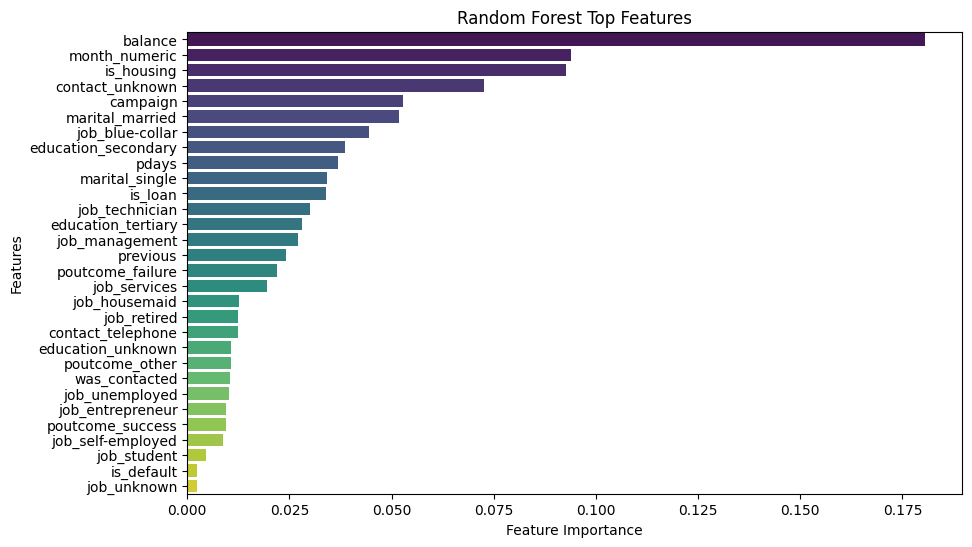

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Random Forest feature importance
# X_train is a numpy array, so it does not have a .columns attribute.
# We need to get the column names from the original DataFrame `df` before it was converted to numpy array.
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=df.columns)
rf_feature_importance = rf_feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=rf_feature_importance.values, y=rf_feature_importance.index, palette="viridis")
plt.title("Random Forest Top Features")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

XGBoost Feature Importance

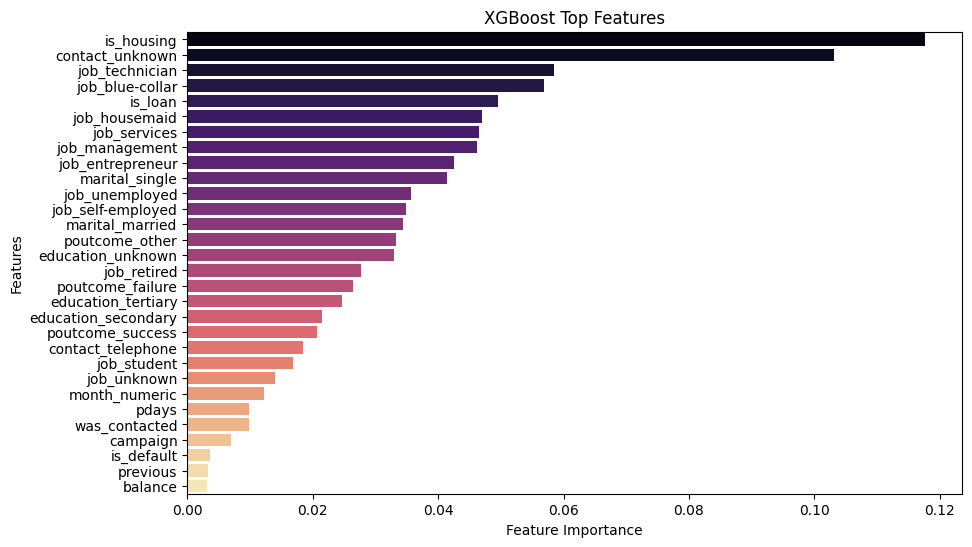

In [ ]:
# XGBoost feature importance
xgb_feature_importance = pd.Series(xgb_model.feature_importances_, index=df.columns)
xgb_feature_importance = xgb_feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=xgb_feature_importance.values, y=xgb_feature_importance.index, palette="magma")
plt.title("XGBoost Top Features")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()